input m =15


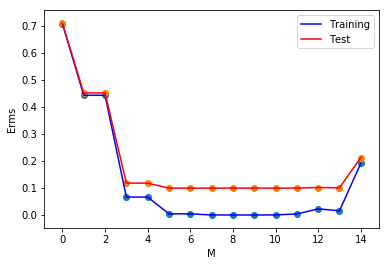

In [39]:
#import needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import cmath

test_g = np.random.normal(0,0.1,1000)
train_g = np.random.normal(0,0.1,1000)
def ERMS(m):
#Generate data of training
#In this script. I creat 100 number of data in sine curve function.
#Gaussian noise genrate
    g1 = train_g #(location, scale, Number of data)
    x = np.arange(0,1,0.001) #Range of x from 0 to 1
    t = np.sin(2*math.pi*x)
    train_t = np.sin(2*math.pi*x)+g1    # training t
    g2 = test_g
    #plt.scatter(x,train_t)
#polynomial curve fitting
    M = m
    X = np.array([x**m for m in range(M+1)]).T # X of training data
    w = np.linalg.inv(X.T@X)@X.T@t # weight???
    #print(w)
# test set
    test_data = np.arange(0.005,1.005,0.001)
    test_t = np.sin(2*math.pi*test_data)+test_g # test t
    #plt.scatter(test_data,test_t)
    X_test_data = np.array([test_data**m for m in range(w.size)]).T # X of test data
    test_predict_curve = X_test_data@w  #test curve
    test_ERMS = abs(cmath.sqrt((np.linalg.norm((w.T@X_test_data.T-test_t.T))**2)/1000))
    #print('test_ERMS=',test_ERMS)
    train_predict_curve = X@w  #training curve
    train_ERMS = abs(cmath.sqrt((np.linalg.norm((w.T@X.T-t.T))**2)/1000))
    #print('train_ERMS=',train_ERMS)
    return test_ERMS,train_ERMS

m = int(input('input m ='))
Erms = np.array([ERMS(m) for m in range(m)])
x = np.arange(0,m,1)
#print(Erms.shape)
p1 = plt.plot(x,Erms[:,1],'b')
p2 = plt.plot(x,Erms[:,0],'r')
plt.scatter(x,Erms[:,1])
plt.scatter(x,Erms[:,0])
plt.xlabel('M')
plt.ylabel('Erms')
plt.rcParams["axes.titlesize"] = 16
plt.legend((p1[0],p2[0]),('Training', 'Test'), fontsize=10)